In [4]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Definir parâmetros
np.random.seed(42)
random.seed(42)

# Criar lista de cidades e produtos
cidades = ['Rio de Janeiro', 'São Paulo', 'Curitiba']
produtos = ['Guarda-chuva', 'Ventilador', 'Pipoca']
lojas = [f'Loja_{i}' for i in range(1, 6)]

# Criar intervalo de datas (30 dias)
datas = pd.date_range(start='2024-06-01', end='2024-06-30')

# Criar lista para armazenar os dados
dados = []

for loja in lojas:
    cidade = random.choice(cidades)
    for produto in produtos:
        for data in datas:
            # Simular evento local
            evento = 1 if (cidade == 'Rio de Janeiro' and data.day in [23, 24, 25]) else 0
            # Simular clima
            chuva = 1 if (cidade == 'Curitiba' and data.day % 5 == 0) else 0
            # Vendas baseadas em produto e evento
            base = np.random.poisson(20)
            ajuste_evento = 10 if evento == 1 else 0
            ajuste_chuva = 5 if chuva == 1 and produto == 'Guarda-chuva' else 0
            vendas = base + ajuste_evento + ajuste_chuva

            dados.append([loja, cidade, produto, data, evento, chuva, vendas])

# Transformar em DataFrame
df = pd.DataFrame(dados, columns=[
    'loja_id', 'cidade', 'produto', 'data', 'evento_local', 'chuva', 'vendas'
])

df.head(10)


,loja_id,cidade,produto,data,evento_local,chuva,vendas
0,Loja_1,Curitiba,Guarda-chuva,2024-06-01,0,0,23
1,Loja_1,Curitiba,Guarda-chuva,2024-06-02,0,0,15
2,Loja_1,Curitiba,Guarda-chuva,2024-06-03,0,0,21
3,Loja_1,Curitiba,Guarda-chuva,2024-06-04,0,0,25
4,Loja_1,Curitiba,Guarda-chuva,2024-06-05,0,1,20
5,Loja_1,Curitiba,Guarda-chuva,2024-06-06,0,0,17
6,Loja_1,Curitiba,Guarda-chuva,2024-06-07,0,0,19
7,Loja_1,Curitiba,Guarda-chuva,2024-06-08,0,0,21
8,Loja_1,Curitiba,Guarda-chuva,2024-06-09,0,0,17
9,Loja_1,Curitiba,Guarda-chuva,2024-06-10,0,1,24


In [5]:
# Modelo 1: previsão pela média histórica por produto
df['prev_modelo1'] = df.groupby('produto')['vendas'].transform('mean').round()

# Modelo 2: aplica visão de negócio (evento e chuva)
df['prev_modelo2'] = df['prev_modelo1'] + \
                     (df['evento_local'] * 10) + \
                     ((df['chuva'] == 1) & (df['produto'] == 'Guarda-chuva')) * 5

df[['loja_id', 'cidade', 'produto', 'data', 'vendas', 'prev_modelo1', 'prev_modelo2']].head(10)

,loja_id,cidade,produto,data,vendas,prev_modelo1,prev_modelo2
0,Loja_1,Curitiba,Guarda-chuva,2024-06-01,23,21.0,21.0
1,Loja_1,Curitiba,Guarda-chuva,2024-06-02,15,21.0,21.0
2,Loja_1,Curitiba,Guarda-chuva,2024-06-03,21,21.0,21.0
3,Loja_1,Curitiba,Guarda-chuva,2024-06-04,25,21.0,21.0
4,Loja_1,Curitiba,Guarda-chuva,2024-06-05,20,21.0,26.0
5,Loja_1,Curitiba,Guarda-chuva,2024-06-06,17,21.0,21.0
6,Loja_1,Curitiba,Guarda-chuva,2024-06-07,19,21.0,21.0
7,Loja_1,Curitiba,Guarda-chuva,2024-06-08,21,21.0,21.0
8,Loja_1,Curitiba,Guarda-chuva,2024-06-09,17,21.0,21.0
9,Loja_1,Curitiba,Guarda-chuva,2024-06-10,24,21.0,26.0


In [6]:
# Calcular o erro absoluto para cada modelo
df['erro_modelo1'] = abs(df['vendas'] - df['prev_modelo1'])
df['erro_modelo2'] = abs(df['vendas'] - df['prev_modelo2'])

# Calcular MAE (erro médio absoluto)
mae1 = df['erro_modelo1'].mean()
mae2 = df['erro_modelo2'].mean()

print(f"MAE do Modelo 1 (sem visão de negócio): {mae1:.2f}")
print(f"MAE do Modelo 2 (com visão de negócio): {mae2:.2f}")

MAE do Modelo 1 (sem visão de negócio): 3.96
MAE do Modelo 2 (com visão de negócio): 3.75


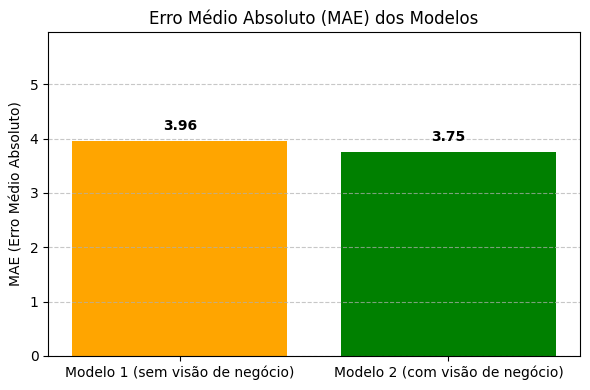

In [7]:
import matplotlib.pyplot as plt

# Plotar o MAE dos dois modelos
plt.figure(figsize=(6, 4))
plt.bar(['Modelo 1 (sem visão de negócio)', 'Modelo 2 (com visão de negócio)'], [mae1, mae2], color=['orange', 'green'])
plt.title('Erro Médio Absoluto (MAE) dos Modelos')
plt.ylabel('MAE (Erro Médio Absoluto)')
plt.ylim(0, max(mae1, mae2) + 2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir valores nas barras
for i, valor in enumerate([mae1, mae2]):
    plt.text(i, valor + 0.2, f'{valor:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()